In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore, skew, kurtosis, normaltest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from statsmodels.stats.weightstats import ztest


In [3]:
import pandas as pd

# Loading  dataset
df = pd.read_csv("/content/SDUD2023.csv")
df_cleaned = df.copy()




In [4]:
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

Dataset contains 5261246 rows and 15 columns.


In [7]:
#removing rows with missing/blank values in  columns
target_cols = ['Units Reimbursed', 'Number of Prescriptions', 'Total Amount Reimbursed',
               'Medicaid Amount Reimbursed', 'Non Medicaid Amount Reimbursed']
df_cleaned = df[target_cols + ['Labeler Code', 'Product Code', 'Package Size']].dropna()



In [8]:
print(df.head(10))

  Utilization Type State      NDC  Labeler Code  Product Code  Package Size  \
0             FFSU    AK  2143380             2          1433            80   
1             FFSU    AK  2143480             2          1434            80   
2             FFSU    AK  2143611             2          1436            11   
3             FFSU    AK  2144509             2          1445             9   
4             FFSU    AK  2144511             2          1445            11   
5             FFSU    AK  2144527             2          1445            27   
6             FFSU    AK  2145780             2          1457            80   
7             FFSU    AK  2146080             2          1460            80   
8             FFSU    AK  2147180             2          1471            80   
9             FFSU    AK  2148480             2          1484            80   

   Year  Quarter  Suppression Used Product Name  Units Reimbursed  \
0  2023        4             False   TRULICITY              2

In [9]:
df.head()

,Utilization Type,State,NDC,Labeler Code,Product Code,Package Size,Year,Quarter,Suppression Used,Product Name,Units Reimbursed,Number of Prescriptions,Total Amount Reimbursed,Medicaid Amount Reimbursed,Non Medicaid Amount Reimbursed
0,FFSU,AK,2143380,2,1433,80,2023,4,False,TRULICITY,242.0,121.0,108458.54,106175.55,2282.99
1,FFSU,AK,2143480,2,1434,80,2023,4,False,TRULICITY,386.0,192.0,173430.95,164814.54,8616.41
2,FFSU,AK,2143611,2,1436,11,2023,4,False,EMGALITY P,28.0,28.0,18655.66,18655.66,0.00
3,FFSU,AK,2144509,2,1445,9,2023,4,True,TALTZ AUTO,NaN,NaN,NaN,NaN,NaN
4,FFSU,AK,2144511,2,1445,11,2023,4,False,TALTZ AUTO,36.0,32.0,239510.10,239510.10,0.00


In [10]:
#getting the unique values of each type
print(df.nunique())

Utilization Type                        2
State                                  53
NDC                                 52952
Labeler Code                          885
Product Code                         6304
Package Size                          100
Year                                    1
Quarter                                 4
Suppression Used                        2
Product Name                        15431
Units Reimbursed                   322707
Number of Prescriptions             26319
Total Amount Reimbursed           1136683
Medicaid Amount Reimbursed        1109638
Non Medicaid Amount Reimbursed     296884
dtype: int64


In [12]:

#  Displaying summary statistics
print("Summary Statistics:\n", df.describe())


Summary Statistics:
                 NDC  Labeler Code  Product Code  Package Size       Year  \
count  5.261246e+06  5.261246e+06  5.261246e+06  5.261246e+06  5261246.0   
mean   3.967724e+10  3.967711e+04  1.315450e+03  2.200681e+01     2023.0   
std    2.808666e+10  2.808677e+04  2.117776e+03  2.751685e+01        0.0   
min    2.010102e+06  2.000000e+00  0.000000e+00  0.000000e+00     2023.0   
25%    9.046767e+08  9.040000e+02  1.800000e+02  1.000000e+00     2023.0   
50%    5.022805e+10  5.022800e+04  4.800000e+02  1.000000e+01     2023.0   
75%    6.586205e+10  6.586200e+04  9.660000e+02  3.000000e+01     2023.0   
max    1.000000e+11  9.999900e+04  9.999000e+03  9.900000e+01     2023.0   

            Quarter  Units Reimbursed  Number of Prescriptions  \
count  5.261246e+06      2.638282e+06             2.638282e+06   
mean   2.486195e+00      4.041845e+04             5.892223e+02   
std    1.121033e+00      2.759652e+06             4.904990e+03   
min    1.000000e+00      4.000

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5261246 entries, 0 to 5261245
Data columns (total 15 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   Utilization Type                object 
 1   State                           object 
 2   NDC                             int64  
 3   Labeler Code                    int64  
 4   Product Code                    int64  
 5   Package Size                    int64  
 6   Year                            int64  
 7   Quarter                         int64  
 8   Suppression Used                bool   
 9   Product Name                    object 
 10  Units Reimbursed                float64
 11  Number of Prescriptions         float64
 12  Total Amount Reimbursed         float64
 13  Medicaid Amount Reimbursed      float64
 14  Non Medicaid Amount Reimbursed  float64
dtypes: bool(1), float64(5), int64(6), object(3)
memory usage: 567.0+ MB


In [14]:
df.describe()

,NDC,Labeler Code,Product Code,Package Size,Year,Quarter,Units Reimbursed,Number of Prescriptions,Total Amount Reimbursed,Medicaid Amount Reimbursed,Non Medicaid Amount Reimbursed
count,5.261246e+06,5.261246e+06,5.261246e+06,5.261246e+06,5261246.0,5.261246e+06,2.638282e+06,2.638282e+06,2.638282e+06,2.638282e+06,2.638282e+06
mean,3.967724e+10,3.967711e+04,1.315450e+03,2.200681e+01,2023.0,2.486195e+00,4.041845e+04,5.892223e+02,8.203812e+04,7.815916e+04,3.878962e+03
std,2.808666e+10,2.808677e+04,2.117776e+03,2.751685e+01,0.0,1.121033e+00,2.759652e+06,4.904990e+03,1.643493e+06,1.603348e+06,8.565602e+04
min,2.010102e+06,2.000000e+00,0.000000e+00,0.000000e+00,2023.0,1.000000e+00,4.000000e-03,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00
25%,9.046767e+08,9.040000e+02,1.800000e+02,1.000000e+00,2023.0,1.000000e+00,7.560000e+02,2.200000e+01,4.128600e+02,3.885600e+02,0.000000e+00
50%,5.022805e+10,5.022800e+04,4.800000e+02,1.000000e+01,2023.0,2.000000e+00,2.332000e+03,5.600000e+01,1.487140e+03,1.387395e+03,2.900000e-01
75%,6.586205e+10,6.586200e+04,9.660000e+02,3.000000e+01,2023.0,3.000000e+00,9.405000e+03,2.000000e+02,7.621010e+03,7.016270e+03,6.777000e+01
max,1.000000e+11,9.999900e+04,9.999000e+03,9.900000e+01,2023.0,4.000000e+00,3.053548e+09,1.037888e+06,6.047652e+08,5.950190e+08,5.379818e+07


In [16]:
# Checking for missing values
print("\nMissing Values:\n", df.isnull().sum())



Missing Values:
 Utilization Type                        0
State                                   0
NDC                                     0
Labeler Code                            0
Product Code                            0
Package Size                            0
Year                                    0
Quarter                                 0
Suppression Used                        0
Product Name                            0
Units Reimbursed                  2622964
Number of Prescriptions           2622964
Total Amount Reimbursed           2622964
Medicaid Amount Reimbursed        2622964
Non Medicaid Amount Reimbursed    2622964
dtype: int64


In [19]:
#dropping null columns
df = df.dropna()


In [20]:
#  Check for missing values
print("\nMissing Values:\n", df.isnull().sum())



Missing Values:
 Utilization Type                  0
State                             0
NDC                               0
Labeler Code                      0
Product Code                      0
Package Size                      0
Year                              0
Quarter                           0
Suppression Used                  0
Product Name                      0
Units Reimbursed                  0
Number of Prescriptions           0
Total Amount Reimbursed           0
Medicaid Amount Reimbursed        0
Non Medicaid Amount Reimbursed    0
dtype: int64


In [22]:
# Identifying numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols=numerical_cols[:6]
print("\nNumerical Columns:", numerical_cols)



Numerical Columns: ['NDC', 'Labeler Code', 'Product Code', 'Package Size', 'Year', 'Quarter']


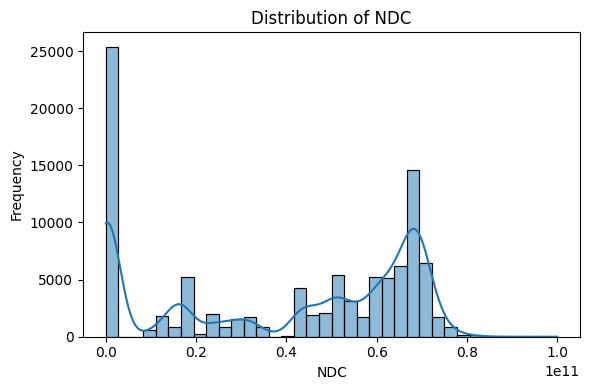

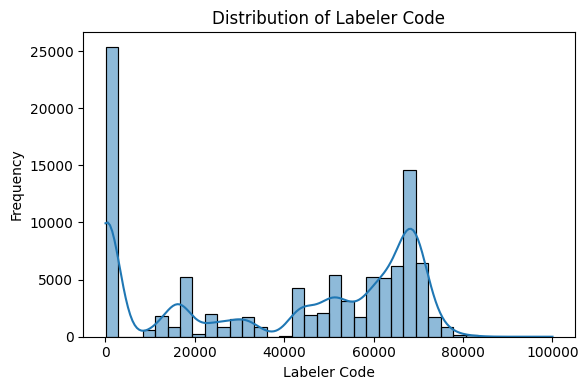

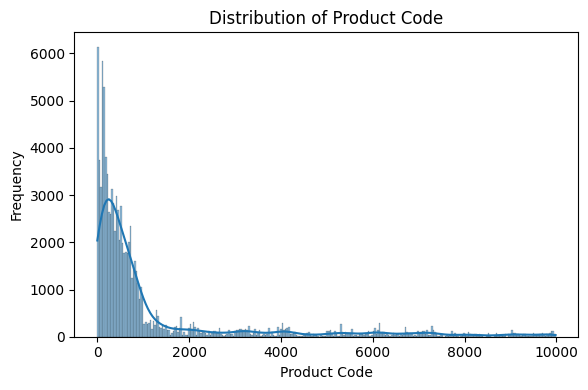

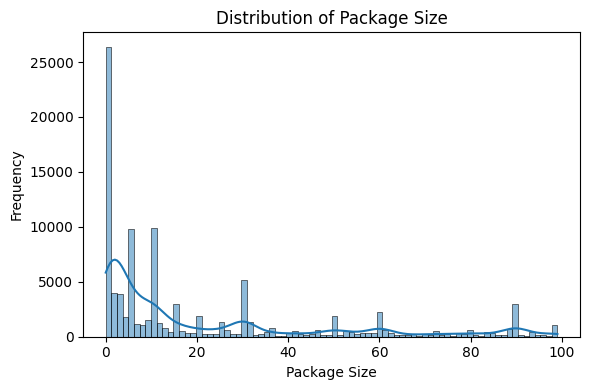

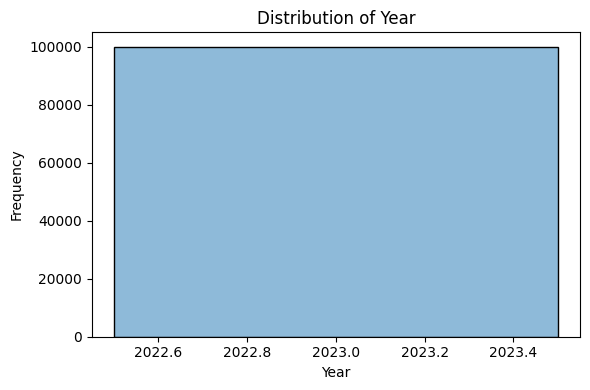

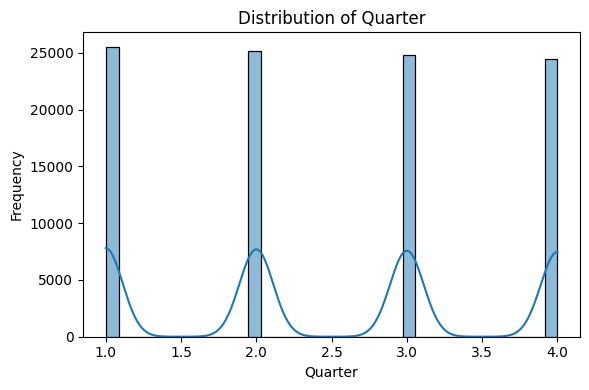

In [24]:
import gc

# Sample a portion of data for plotting (100k rows)
sampled_df = df.sample(n=100_000, random_state=42)

# Plot distribution for each numerical column
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(sampled_df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

    # Clean up memory to prevent crash
    plt.clf()
    plt.close()
    gc.collect()

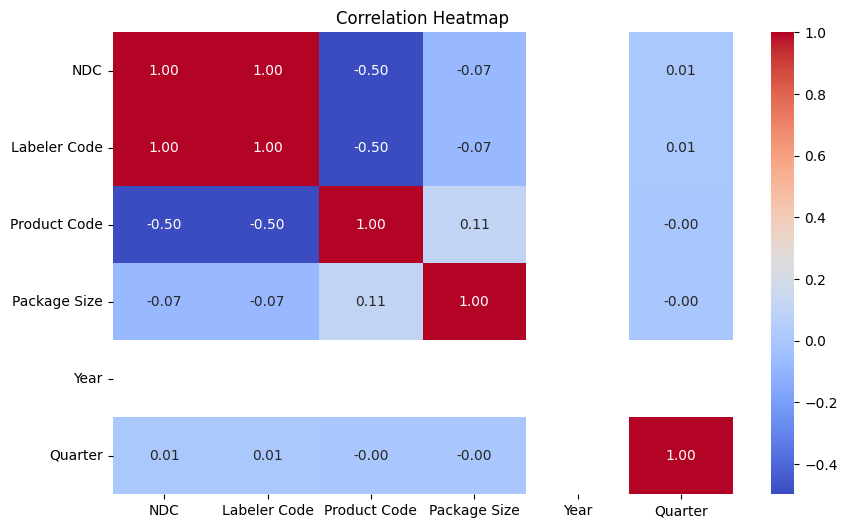

In [26]:
# Computation and plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()



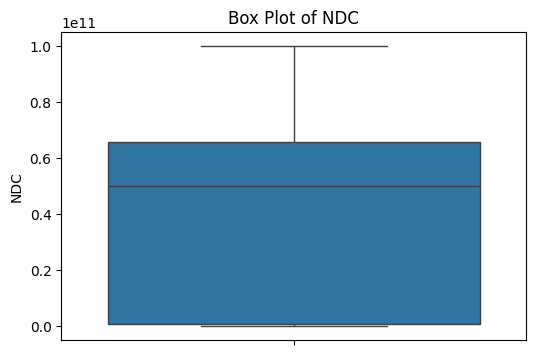

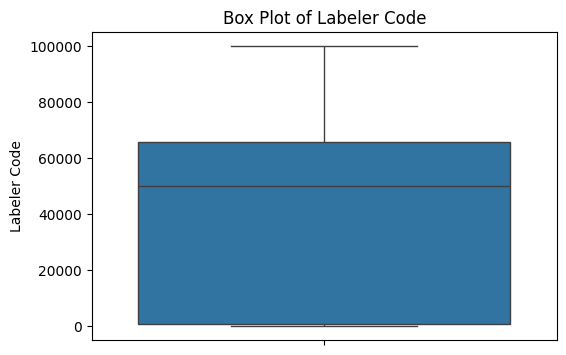

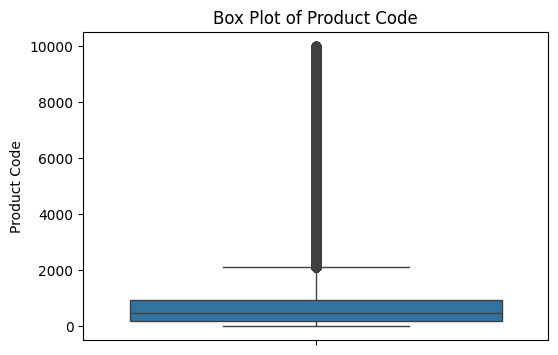

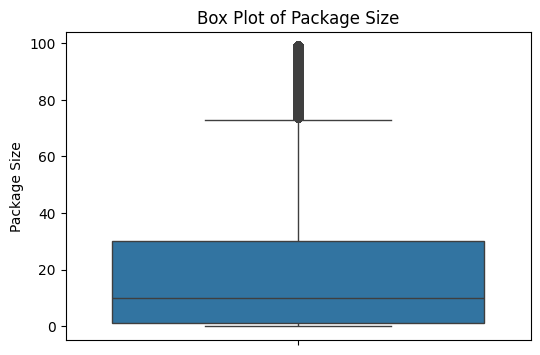

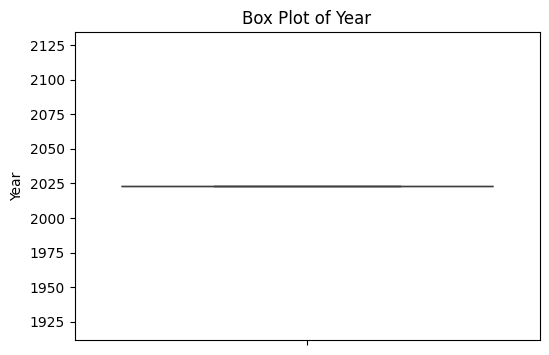

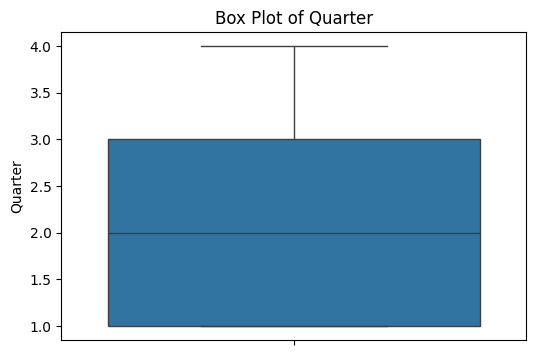

In [27]:
# SGenerating box plots
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col])
    plt.title(f"Box Plot of {col}")
    plt.show()



In [28]:
#Removing outliers using Z-score
threshold = 3
df_cleaned = df[(np.abs(zscore(df[numerical_cols])) < threshold).all(axis=1)]

In [29]:
# Relevant columns for medical and financial data
target_cols = [
    'Units Reimbursed',
    'Number of Prescriptions',
    'Total Amount Reimbursed',
    'Medicaid Amount Reimbursed',
    'Non Medicaid Amount Reimbursed'
]


In [31]:
# Removing outliers based on Z-score for relevant columns
from scipy.stats import zscore

z_scores = zscore(df[target_cols])
df_cleaned = df[(np.abs(z_scores) < 3).all(axis=1)]


from scipy.stats import zscore

df_cleaned = df.copy()
for col in target_cols:
    df_cleaned = df_cleaned[(np.abs(zscore(df_cleaned[col])) < 3)]




In [32]:
df_cleaned = df.copy()
for col in target_cols:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_cleaned = df_cleaned[(df_cleaned[col] >= lower) & (df_cleaned[col] <= upper)]


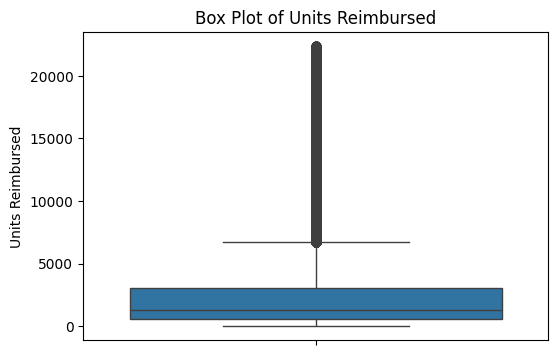

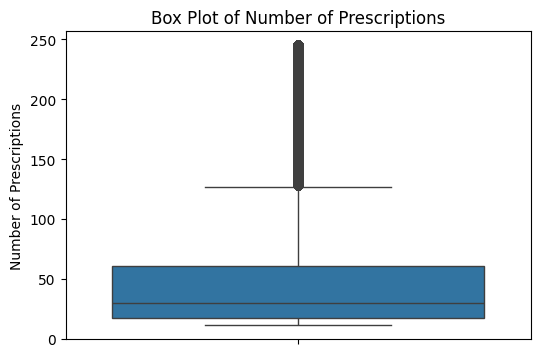

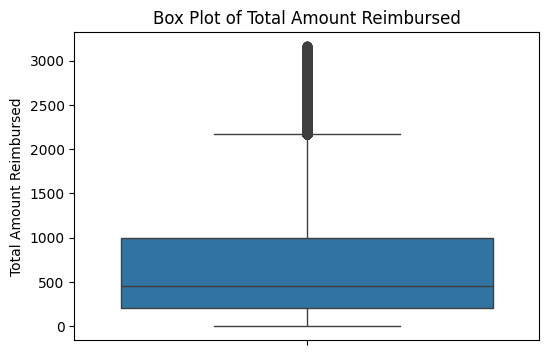

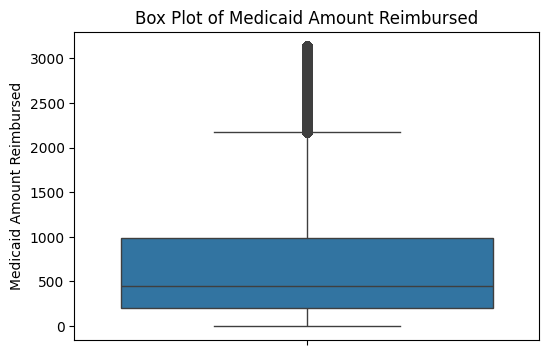

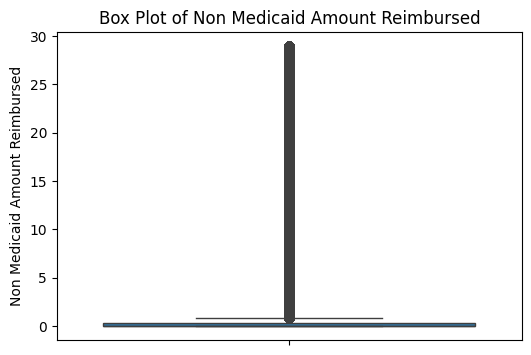

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

for target in target_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df_cleaned[target])
    plt.title(f"Box Plot of {target}")
    plt.show()

In [34]:
from scipy.stats import skew, kurtosis, zscore
from statsmodels.stats.weightstats import ztest

# Step 10: Compute skewness, kurtosis, and one-sample Z-test
print("\n--- Skewness, Kurtosis, and Z-Test (One-Sample against Mean=0) ---")
for col in target_cols:
    data = df_cleaned[col].dropna()

    # Skewness & Kurtosis
    skew_val = skew(data)
    kurt_val = kurtosis(data)

    # Z-test: test if mean ≠ 0 (or you can use test_value=np.mean(data) to simulate a population mean)
    z_stat, p_val = ztest(data, value=0)

    print(f"\nFeature: {col}")
    print(f"Skewness: {skew_val:.4f}")
    print(f"Kurtosis: {kurt_val:.4f}")
    print(f"Z-test statistic: {z_stat:.4f}")
    print(f"Z-test p-value: {p_val:.4e}")



--- Skewness, Kurtosis, and Z-Test (One-Sample against Mean=0) ---

Feature: Units Reimbursed
Skewness: 2.5911
Kurtosis: 8.3786
Z-test statistic: 911.8181
Z-test p-value: 0.0000e+00

Feature: Number of Prescriptions
Skewness: 1.8807
Kurtosis: 3.2680
Z-test statistic: 1192.2842
Z-test p-value: 0.0000e+00

Feature: Total Amount Reimbursed
Skewness: 1.4432
Kurtosis: 1.4459
Z-test statistic: 1173.2807
Z-test p-value: 0.0000e+00

Feature: Medicaid Amount Reimbursed
Skewness: 1.4446
Kurtosis: 1.4496
Z-test statistic: 1169.8414
Z-test p-value: 0.0000e+00

Feature: Non Medicaid Amount Reimbursed
Skewness: 2.4821
Kurtosis: 5.3894
Z-test statistic: 506.0025
Z-test p-value: 0.0000e+00


In [ ]:
from sklearn.model_selection import train_test_split

# Replace 'Target' with the actual name of your target column
X = df_cleaned.drop(columns=['Total Amount Reimbursed'])
y = df_cleaned['Total Amount Reimbursed']

# Train-Test Split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Downsample to avoid system crashes
sample_df = df_cleaned.sample(n=10000, random_state=42) if len(df_cleaned) > 10000 else df_cleaned.copy()

# Define features and target
X = sample_df.drop(columns=['Total Amount Reimbursed'])
y = sample_df['Total Amount Reimbursed']

# One-hot encoding of categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42)


In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

if 'df_cleaned' not in locals():
    raise NameError("Please load or define 'df_cleaned' before running this.")

# Step 1: Sample data to avoid memory crashes
df_sampled = df_cleaned.sample(n=10000, random_state=42) if len(df_cleaned) > 10000 else df_cleaned.copy()

# Step 2: Detect and remove potential data leakage
target_col = 'Total Amount Reimbursed'
correlation_threshold = 0.9
corr_matrix = df_sampled.corr(numeric_only=True)
high_corr_features = corr_matrix[target_col][(abs(corr_matrix[target_col]) > correlation_threshold) & (corr_matrix[target_col].index != target_col)].index.tolist()
if high_corr_features:
    print(f"Potential leakage detected: {high_corr_features}. Dropping them.")
    df_sampled.drop(columns=high_corr_features, inplace=True)

# Step 3: Prepare features and target
X = pd.get_dummies(df_sampled.drop(columns=[target_col]), drop_first=True)
y = df_sampled[target_col]

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train and evaluate regression models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "Support Vector Regressor": SVR()
}

print("----- Model Evaluation (Regression) -----\n")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\nModel: {name}")
    print("Mean Squared Error (MSE):", round(mean_squared_error(y_test, y_pred), 2))
    print("R² Score:", round(r2_score(y_test, y_pred), 4))
    print("-" * 60)


Potential leakage detected: ['Medicaid Amount Reimbursed']. Dropping them.
----- Model Evaluation (Regression) -----


Model: Linear Regression
Mean Squared Error (MSE): 282000.21
R² Score: 0.3798
------------------------------------------------------------

Model: Random Forest Regressor
Mean Squared Error (MSE): 263203.05
R² Score: 0.4212
------------------------------------------------------------

Model: Support Vector Regressor
Mean Squared Error (MSE): 513819.01
R² Score: -0.13
------------------------------------------------------------


In [37]:
from statsmodels.stats.weightstats import ztest

# Hypothetical population mean to test against (adjust if needed)
pop_mean = 0

# Perform Z-test on the target column
z_score, p_value = ztest(y, value=pop_mean)

print("----- Z-Test on 'Total Amount Reimbursed' -----")
print(f"Z-score: {z_score:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("✅ The difference is statistically significant (reject H0).")
else:
    print("❌ No significant difference found (fail to reject H0).")


----- Z-Test on 'Total Amount Reimbursed' -----
Z-score: 101.2919
P-value: 0.0000
✅ The difference is statistically significant (reject H0).


In [ ]:
# Use residuals from the best-performing model (e.g., Random Forest)
residuals = y_test - models["Random Forest Regressor"].predict(X_test)

z_resid, p_resid = ztest(residuals, value=0)

print("\n----- Z-Test on Model Residuals -----")
print(f"Z-score: {z_resid:.4f}")
print(f"P-value: {p_resid:.4f}")

if p_resid < 0.05:
    print("⚠️ Residuals are significantly different from 0 (possible bias).")
else:
    print("✅ Residuals are centered around 0 (no bias).")



----- Z-Test on Model Residuals -----
Z-score: 5.1525
P-value: 0.0000
⚠️ Residuals are significantly different from 0 (possible bias).
